<a href="https://colab.research.google.com/github/Pablo-app-developer/trading-algoritmico-analisis-tecnico/blob/main/ES_TA_Cap%C3%ADtulo_04_Estrategias_con_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/04/cropped-Logo_Quantreo_transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Estrategias con RSI

Para crear la estrategia de esta sección, vamos a importar una nueva biblioteca que es la biblioteca ta (análisis técnico). La estrategia se creará utilizando el indicador RSI (descripción detallada en el siguiente cuadro).

### Contenido

* Explicación y cálculo del RSI
* Hacer una estrategia con el RSI
* Automatizar la estrategia


<br>
<br>

💰 Únete a la comunidad de [Discord](https://discord.gg/z3dx5XpkX4)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.es/Python-para-finanzas-trading-algor%C3%ADtmico-ebook/dp/B0BT4ZS9Q3/)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español


In [1]:
!pip install ta
!pip install yfinance
!pip install hurst

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=87317eff178fe549317eda5c75556cd992c25859695a984dc1a82c1263ce07a0
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [2]:
# Importar Librerías

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from tqdm import tqdm
from scipy.optimize import minimize
from hurst import compute_Hc
import warnings
warnings.filterwarnings("ignore")


In [3]:
# El código aquí le permitirá cambiar los gráficos a modo oscuro para aquellos que elijan programar en modo oscuro

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Sección 1: Explicación y cálculo del RSI

### Explicación
El RSI (Índice de Fuerza Relativa) nos permitirá entender la fuerza de una tendencia e identificar el final de una tendencia. El valor del RSI varía de 0 a 100.

* Si el RSI está en torno al nivel 70, se supone que el instrumento está sobrecomprado. Se trata de una situación en la que los precios han subido mucho y es probable que el movimiento se debilite.
* Si el RSI está alrededor del nivel 30, es una señal técnica de que el instrumento puede estar sobrevendido. En este caso, se trata de una situación en la que los precios han caído bruscamente, y el movimiento puede perder fuerza.
* Si el indicador oscila horizontalmente alrededor del nivel 50, significa que el mercado carece de tendencia. El nivel 50 es la línea media que separa los territorios alcistas y bajistas del indicador...

Hay que tener en cuenta que el RSI es un indicador de la familia de los osciladores, por lo que funcionará un poco menos bien en mercados con menos volatilidad, como la bolsa.




In [4]:
# Import the data
f = yf.download("GOOG")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [9]:
print (f)

Price            Close        High         Low        Open     Volume
Ticker            GOOG        GOOG        GOOG        GOOG       GOOG
Date                                                                 
2004-08-19    2.490186    2.582506    2.381485    2.481747  897427216
2004-08-20    2.687981    2.707090    2.494156    2.506813  458857488
2004-08-23    2.715032    2.816287    2.706346    2.748535  366857939
2004-08-24    2.602609    2.769630    2.570346    2.760696  306396159
2004-08-25    2.630652    2.680287    2.578039    2.604841  184645512
...                ...         ...         ...         ...        ...
2025-02-26  174.699997  178.080002  173.589996  176.945007   23637200
2025-02-27  170.210007  176.589996  169.751999  175.940002   25930500
2025-02-28  172.220001  172.500000  168.389999  170.300003   30049800
2025-03-03  168.660004  175.000000  167.639999  173.729996   24122000
2025-03-04  172.610001  175.164993  167.539993  167.940002   30667900

[5168 rows x 5 colu

In [13]:
# Compute the rsi
f["rsi"] = ta.momentum.RSIIndicator(f["Close"].squeeze(), window=14).rsi()
#squeeze() se utiliza para convertir la serie pandas en un array numpy unidimensional.
f

Price,Close,High,Low,Open,Volume,rsi
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2004-08-19,2.490186,2.582506,2.381485,2.481747,897427216,NaN
2004-08-20,2.687981,2.707090,2.494156,2.506813,458857488,NaN
2004-08-23,2.715032,2.816287,2.706346,2.748535,366857939,NaN
2004-08-24,2.602609,2.769630,2.570346,2.760696,306396159,NaN
2004-08-25,2.630652,2.680287,2.578039,2.604841,184645512,NaN
...,...,...,...,...,...,...
2025-02-26,174.699997,178.080002,173.589996,176.945007,23637200,30.510912
2025-02-27,170.210007,176.589996,169.751999,175.940002,25930500,27.037735


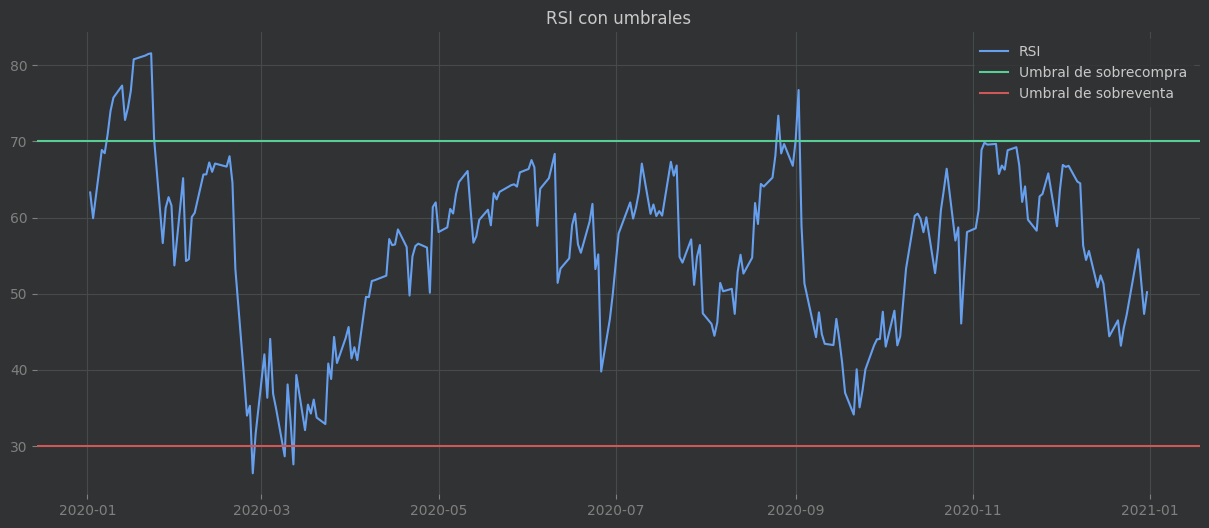

In [14]:
# Plot the RSI with the overbuy and overell threshold

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# View the RSI
plt.plot(f["rsi"].loc["2020"])

# View horizontal line for the Overbuy threshold (RSI=70)
plt.axhline(70, color="#57CE95")

# View horizontal line for the Oversell threshold (RSI=30)
plt.axhline(30, color="#CE5757")

# Put a title
plt.title("RSI con umbrales")

# Put a legend
plt.legend(["RSI", "Umbral de sobrecompra", "Umbral de sobreventa"])

# Show the graph
plt.show()

# Sección 2: Crear una estrategia basada en el RSI

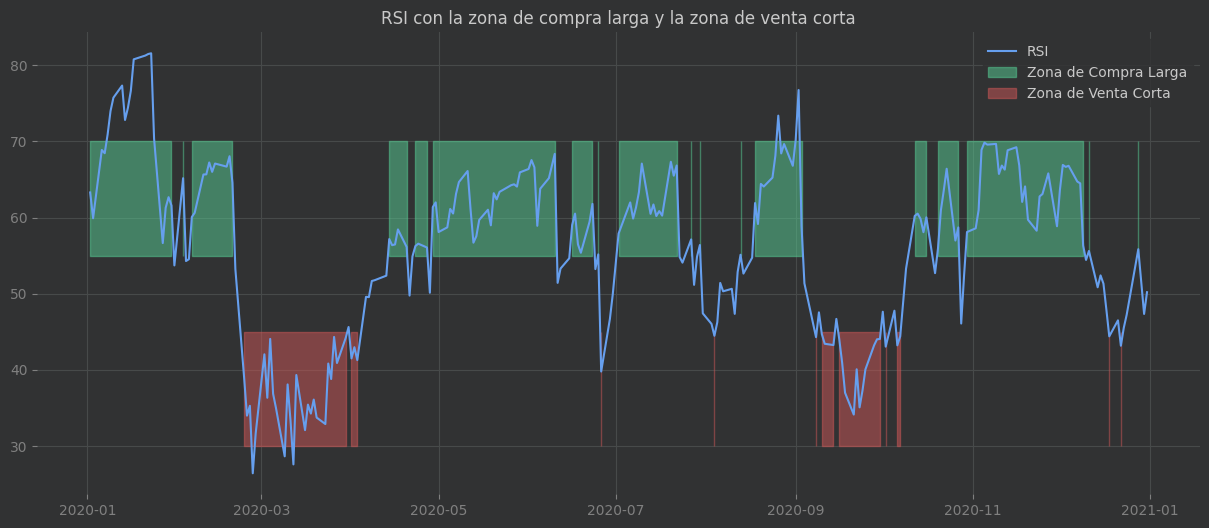

In [16]:
# Representar el RSI con la zona de compra larga y la zona de venta corta

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Ver el RSI
plt.plot(f["rsi"].loc["2020"])

# Ver la línea horizontal para el umbral de sobrecompra  (RSI=70)
# El argumento 'where' se modifica para crear una matriz booleana
# comparando los valores 'rsi' con 55 para cada punto de datos.
plt.fill_between(f["rsi"].loc["2020"].index, 55, 70, where=(f["rsi"].loc["2020"] > 55), color="#57CE95", alpha=0.5)

# Ver la línea horizontal para el umbral de sobreventa (RSI=30)
# Modificación similar para el argumento 'where' aquí.
plt.fill_between(f["rsi"].loc["2020"].index, 30, 45, where=(f["rsi"].loc["2020"] < 45), color="#CE5757", alpha=0.5)

# Colocar el título
plt.title("RSI con la zona de compra larga y la zona de venta corta")

# Añadir la leyenda
plt.legend(["RSI", "Zona de Compra Larga", "Zona de Venta Corta"])

# Representar el gráfico
plt.show()

In [17]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# Necesitamos definir la señal de apertura en largo y la señal de cierre en largo

# Ponemos el umbral
overbuy = 70
neutral_buy = 55

# Poner valores nan para las columnas de la señal larga
f["signal_long"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la señal de apertura en largo (RSI ayer<55 y RSI hoy>55)
f.loc[(f["rsi"]>neutral_buy) & (f["yersteday_rsi"]<neutral_buy), "signal_long"] = 1

# Necesitamos definir la señal cierre en largo (RSI ayer>55 y RSI hoy<55) Señal falsa
f.loc[(f["rsi"]<neutral_buy)&(f["yersteday_rsi"]>neutral_buy), "signal_long"] = 0

# Necesitamos definir la señal cierre en largo (RSI yersteday<70 y RSI today>70) Señal de sobrecompra
f.loc[(f["rsi"]>overbuy)&(f["yersteday_rsi"]<overbuy), "signal_long"] = 0


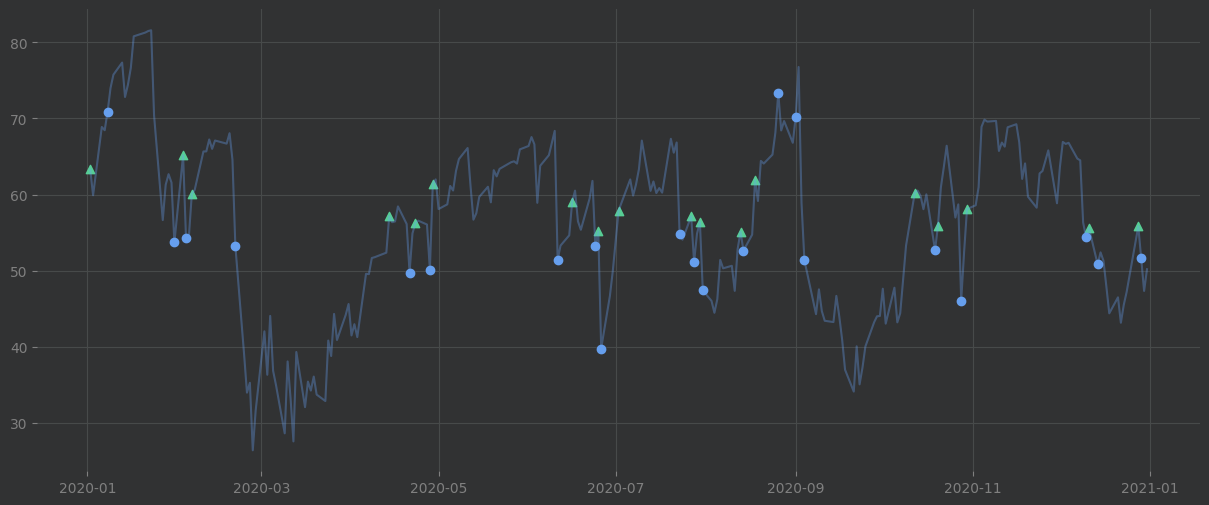

In [18]:
# Representamos todas las señales para asegurarnos de que son correctas

# Seleccionar todas las señales en una lista de índices para representar sólo estos puntos
idx_open = f.loc[f["signal_long"]==1].loc["2020"].index
idx_close = f.loc[f["signal_long"]==0].loc["2020"].index


# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Traza los puntos de la apertura de señal larga en verde
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2020"], color= "#57CE95", marker="^")

# Traza los puntos del cierre de señal larga en azul
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2020"], color= "#669FEE", marker="o")

# Representamos el rsi para asegurarse de que las condiciones se completan
plt.plot(f["rsi"].loc["2020"].index, f["rsi"].loc["2020"], alpha=0.35)

# Representamos el gráfico
plt.show()

In [19]:
# Definimos cuando la estrategia debe tomar una compra larga o una venta corta

# ******************************************************************************
# Necesitamos definir la señal de Abrir la posición Corta y Cerrar la posición Corta

# Ponemos el umbral
oversell = 30
neutral_sell= 45

# Poner valores nan para las columnas de la señal larga
f["signal_short"] = np.nan
f["yersteday_rsi"] = f["rsi"].shift(1)
# Necesitamos definir la señal de apertura en corto (RSI ayer>45 y RSI hoy<45)
f.loc[(f["rsi"]<neutral_sell) & (f["yersteday_rsi"]>neutral_sell), "signal_short"] = -1

# Necesitamos definir la señal de cierre en corto (RSI ayer<45 y RSI hoy>45) Señal falsa
f.loc[(f["rsi"]>neutral_sell)&(f["yersteday_rsi"]<neutral_sell), "signal_short"] = 0

# Necesitamos definir la señal de cierre en corto (RSI ayer>30 y RSI hoy<30) Señal de sobre venta
f.loc[(f["rsi"]<oversell)&(f["yersteday_rsi"]>oversell), "signal_short"] = 0

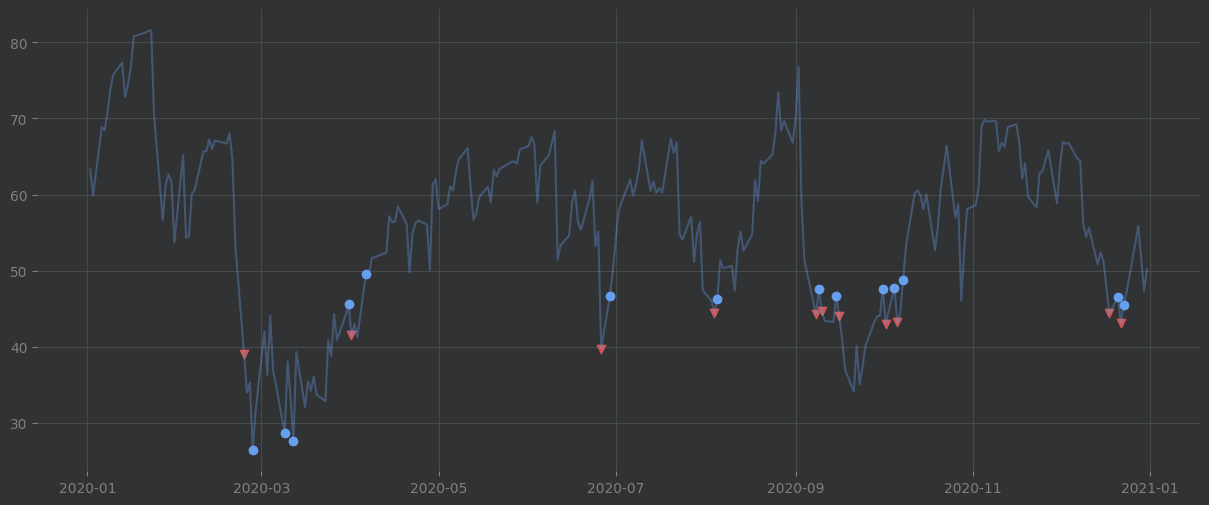

In [37]:
#Representamos todas las señales para asegurarnos de que son correctas

# Seleccionar todas las señales en una lista de índices para representar sólo estos puntos
idx_open = f.loc[f["signal_short"]==-1].loc["2020"].index
idx_close = f.loc[f["signal_short"]==0].loc["2020"].index

# Adaptar el tamaño del gráfico
plt.figure(figsize=(15,6))

# Traza los puntos de la apertura de señal corta en rojo
plt.scatter(f.loc[idx_open]["rsi"].index, f.loc[idx_open]["rsi"].loc["2020"], color= "#CE5757", marker="v")

# Traza los puntos del cierre de señal corta en azul
plt.scatter(f.loc[idx_close]["rsi"].index, f.loc[idx_close]["rsi"].loc["2020"], color= "#669FEE", marker="o")

# Representamos el rsi para asegurarse de que las condiciones se completan
plt.plot(f["rsi"].loc["2020"].index, f["rsi"].loc["2020"], alpha=0.35)

# Representamos el gráfico
plt.show()

In [38]:
f["Position"] = (f["signal_short"].fillna(method="ffill")+ f["signal_long"].fillna(method="ffill"))
f.dropna(thresh = 10)

Price,Close,High,Low,Open,Volume,rsi,signal_long,yersteday_rsi,signal_short,Position,pct,return
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,,,,,,,
Date,,,,,,,,,,,,
2007-07-20,12.908064,12.984005,12.644502,12.704064,713556598,41.867719,0.0,68.894544,-1.0,-1.0,NaN,NaN
2010-04-16,13.653332,14.116426,13.640427,13.972236,491254466,41.447641,0.0,71.950426,-1.0,-1.0,NaN,NaN
2010-07-16,11.406359,11.678109,11.404125,11.642373,314165171,43.244462,0.0,60.155555,-1.0,-1.0,NaN,NaN
2012-01-20,14.542790,14.667125,14.436324,14.655462,424637703,33.871147,0.0,55.489447,-1.0,-1.0,NaN,NaN
2012-05-18,14.900411,15.695066,14.808586,15.513402,239835606,43.852261,0.0,55.068160,-1.0,-1.0,NaN,NaN
2012-10-18,17.248144,18.846884,16.776612,18.750594,499561487,35.008163,0.0,62.370774,-1.0,-1.0,NaN,NaN
2013-01-23,18.402155,18.588286,18.260448,18.265413,237249950,62.029732,1.0,41.934140,0.0,1.0,NaN,NaN
2014-07-31,28.399704,28.998404,28.320209,28.846866,42055146,44.396426,0.0,55.630750,-1.0,-1.0,NaN,NaN


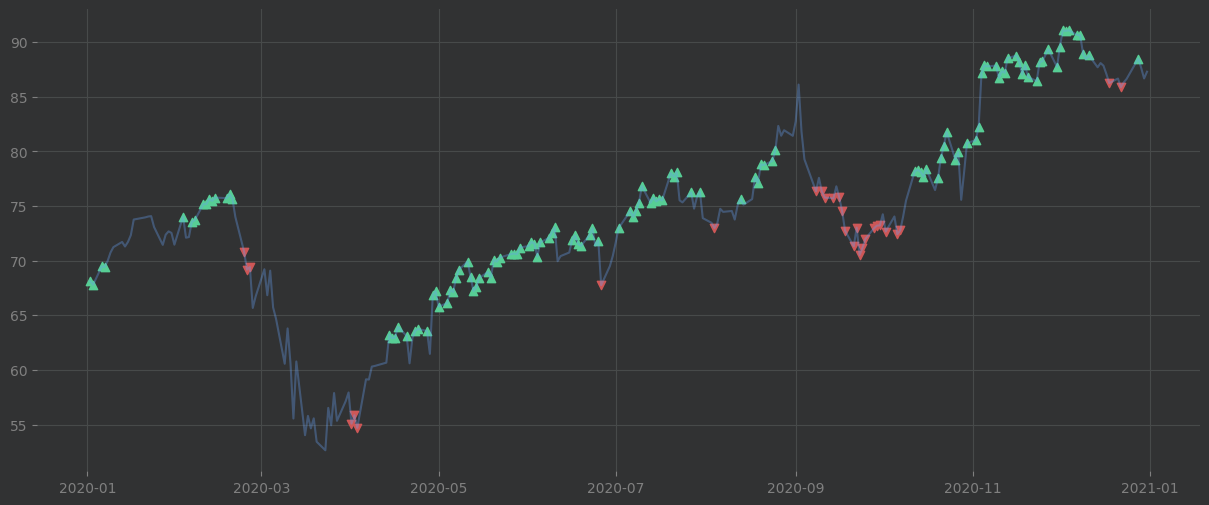

In [39]:
# We plot all the signal to be sure that they be correct
year = "2020"
idx_long = f.loc[f["Position"]==1].loc[year].index
idx_short = f.loc[f["Position"]==-1].loc[year].index

# Adapt the size of the graph
plt.figure(figsize=(15,6))

# Plot the points of the short signal in red
plt.scatter(f.loc[idx_short]["Close"].index, f.loc[idx_short]["Close"].loc[year], color= "#CE5757", marker="v")

# Plot the points of the long signal in green
plt.scatter(f.loc[idx_long]["Close"].index, f.loc[idx_long]["Close"].loc[year], color= "#57CE95", marker="^")

# Plot the rsi to be sure that the conditions are completed
plt.plot(f["Close"].loc[year].index, f["Close"].loc[year], alpha=0.35)

# Show the graph
plt.show()

<Axes: xlabel='Date'>

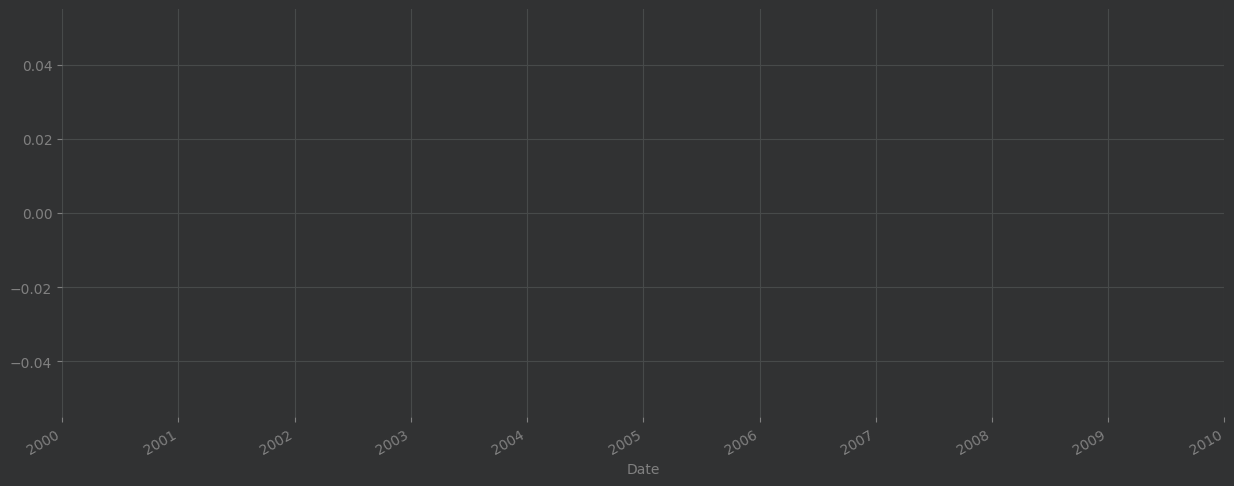

In [40]:
# Calcular el porcentaje de variación del activo
f["pct"] = f["Close"].pct_change(1)

# Calcular la rentabilidad de la estrategia
f["return"] = f["pct"]*(f["Position"].shift(1))

#(1,2,3,-1) --> (1,3,6,5)
f["return"].loc["2020"].cumsum().plot(figsize=(15,6))

# Crear una función para hacer la estrategia RSI más tarde



In [43]:
def RSI(val, neutral, window):
  """
        ------------------------------------------------------------------------------
        | Output: La función da los rendimientos de la estrategia RSI                |
        ------------------------------------------------------------------------------
        | Inputs: -val (type dataframe pandas): Valores de entrada de la acción      |
        |         -neutral (float): Valor neutral, es decir, zona de no acción       |
        |         -window (float): período de balanceo para el RSI                   |
        ------------------------------------------------------------------------------
  """

  # Print Error if there is no column Adj Close in the dataframe
  if "Adj Close" not in val.columns:
    ValueError("Necesitamos tener un nombre de columna Adj Close porque todos los cálculos se refieren a esta columna")

  val["rsi"] = ta.momentum.RSIIndicator(val["Adj Close"], window=window).rsi()



  """Señal de compra en largo """
  # Colocamos el umbral
  overbuy = 70
  neutral_buy = 50 + neutral

  # Poner valores nan para las columnas de la señal larga
  val["signal_long"] = np.nan
  val["yersteday_rsi"] = val["rsi"].shift(1)
  # Necesitamos definir la señal de apertura en largo (RSI ayer<55 y RSI hoy>55)
  val.loc[(val["rsi"]>neutral_buy) & (val["yersteday_rsi"]<neutral_buy), "signal_long"] = 1

  # Necesitamos definir la señal cierre en largo (RSI ayer>55 y RSI hoy<55) Señal falsa
  val.loc[(val["rsi"]<neutral_buy)&(val["yersteday_rsi"]>neutral_buy), "signal_long"] = 0

  # Necesitamos definir la señal cierre en largo (RSI ayer<70 y RSI hoy>70) Señal de sobrecompra
  val.loc[(val["rsi"]>overbuy)&(val["yersteday_rsi"]<overbuy), "signal_long"] = 0



  """Señal de venta en corto """
  # Colocamos el umbral
  oversell = 30
  neutral_sell = 50 - neutral

  # Poner valores nan para las columnas de la señal larga
  val["signal_short"] = np.nan
  val["yersteday_rsi"] = val["rsi"].shift(1)
  # Necesitamos definir la señal de apertura en corto (RSI ayer>45 y RSI hoy<45)
  val.loc[(val["rsi"]<neutral_sell) & (val["yersteday_rsi"]>neutral_sell), "signal_short"] = -1

  # Necesitamos definir la señal de cierre en corto (RSI ayer<45 y RSI hoy>45) Señal falsa
  val.loc[(val["rsi"]>neutral_sell)&(val["yersteday_rsi"]<neutral_sell), "signal_short"] = 0

  # Necesitamos definir la señal de cierre en corto (RSI ayer>30 y RSI hoy<30) Señal de sobre venta
  val.loc[(val["rsi"]<oversell)&(val["yersteday_rsi"]>oversell), "signal_short"] = 0

  """Calcular el retorno """
  # Calculamos el porcentaje de variación del activo
  val["pct"] = val["Adj Close"].pct_change(1)

  # Calculamos las posiciones
  val["Position"] = (val["signal_short"].fillna(method="ffill")+ val["signal_long"].fillna(method="ffill"))

  # Calculamos el valor de retorno de la estrategia
  val["return"] = val["pct"]*(val["Position"].shift(1))

  return val["return"]

In [42]:
RSI(f.loc["2020"],5, 14).cumsum().plot(figsize=(15,6))

KeyError: 'Adj Close'